# Series de tiempo

Toda serie de tiempo puede estar compuesta por *algunos o todos* estos elementos:

1. **Tendencia (Trend)**
2. **Estacionalidad (Seasonality)**
3. **Ruido (Noise)**

La mejor forma de visualizarlos es con la **descomposición clásica**, que podemos hacer con `statsmodels`.

---

# Descomposición de una serie con `statsmodels`

```python
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(serie, model='additive', period=12)
result.plot()
```

Esto produce 4 gráficos:

* **Observed** → la serie original
* **Trend** → la tendencia a largo plazo
* **Seasonal** → patrón repetitivo
* **Residual** → lo que queda (ruido)

---

# Tipos de series de tiempo con ejemplos

## 1. Serie NO estacionaria con tendencia

**Características:**

* Media cambia en el tiempo
* Varianza puede cambiar
* Tiene una forma “ascendente” o “descendente”

**Ejemplo:**

```python
import numpy as np
t = np.arange(100)
# https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html
# scale = desviacion estandar
serie = t + np.random.normal(scale=2, size=100)
```

**Descomposición**:

* Tendencia fuerte
* Estacionalidad mínima
* Residual aleatorio

**Conclusión:**
❌ **No se puede predecir directamente.**
✔️ Debes transformarla → diferenciación:

```python
serie_diff = serie.diff().dropna()
```

---

## 2. Serie con estacionalidad clara

**Características:**

* Patrones repetitivos: mensual, semanal, anual
* Puede o no tener tendencia

**Ejemplo:**

```python
np.random.seed(0)
t = np.arange(120)
seasonal_pattern = 10 * np.sin(2 * np.pi * t / 12)
serie = seasonal_pattern + np.random.normal(scale=1, size=120)
```

**Descomposición**:

* Seasonal muestra el ciclo anual
* Trend puede ser débil
* Residual bien distribuido

**Conclusión:**
❌ No se puede predecir directamente.
✔️ Se necesita ajustar un **SARIMA** o **desestacionalizar**:

```python
serie_adj = serie - result.seasonal
```

---

## 3. Serie estacionaria

**Características:**

* Sin tendencia
* Sin estacionalidad fuerte
* Varianza constante
* Media constante

**Ejemplo:**

```python
serie = np.random.normal(size=200)
```

**Descomposición:**

* Trend ≈ 0
* Seasonality ≈ 0
* Residual ≈ la serie misma

**Conclusión:**
✔️ **Se puede modelar y predecir directamente (ARMA, ARIMA con d=0)**

---

# Regla práctica: ¿Cuándo se puede predecir?

## ✔️ **Puedes predecir cuando la serie es estacionaria**

Una serie es estacionaria si:

* Su media no cambia en el tiempo
* Su varianza es constante
* No tiene tendencia
* No tiene estacionalidad marcada

🔍 La prueba ADF (Dickey-Fuller) te lo confirma:

* **p < 0.05 ⇒ estacionaria → se puede predecir**
* **p ≥ 0.05 ⇒ no estacionaria → NO se puede predecir aún**

---

## ❌ No puedes predecir directamente cuando la serie:

### 1. Tiene tendencia

Hay que **diferenciar**:

```python
serie_diff = serie.diff()
```

### 2. Tiene estacionalidad

Hay que **diferenciar estacionalmente**:

```python
serie_seasonal_diff = serie.diff(12)
```

### 3. Tiene varianza cambiante (heterocedasticidad)

Hay que transformar (log, Box-Cox).

---

# Resumen en una frase

> **Solo se puede predecir una serie si es estacionaria.
> Si no lo es, debemos transformarla (diferenciar, desestacionalizar, etc.) hasta que lo sea.**



/tmp/ipython-input-3454457850.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  idx = pd.date_range(start="2000-01-01", periods=120, freq="M")


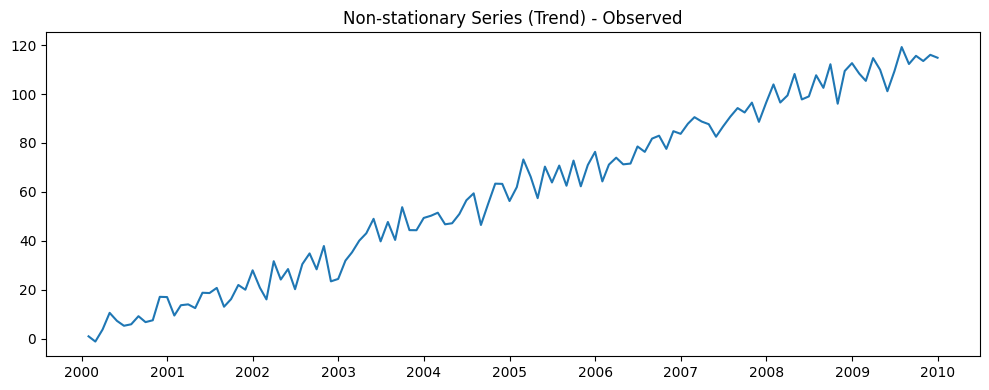

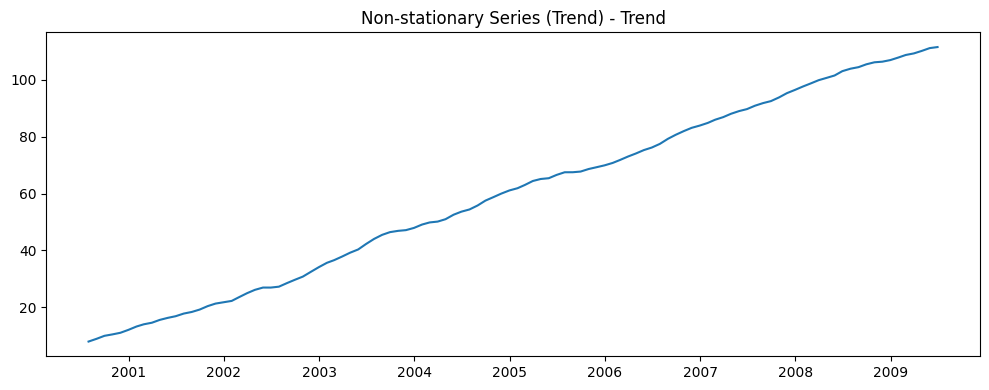

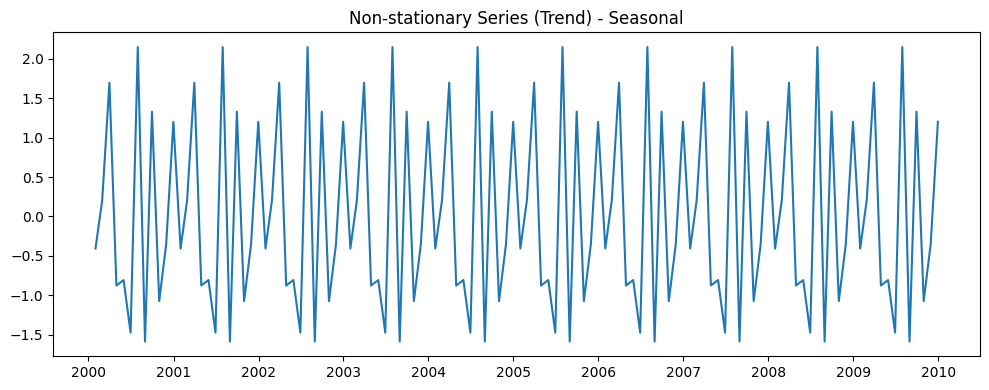

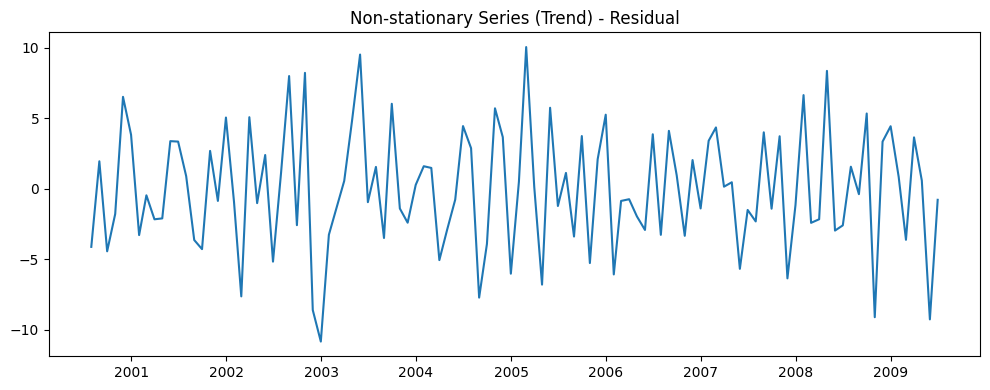

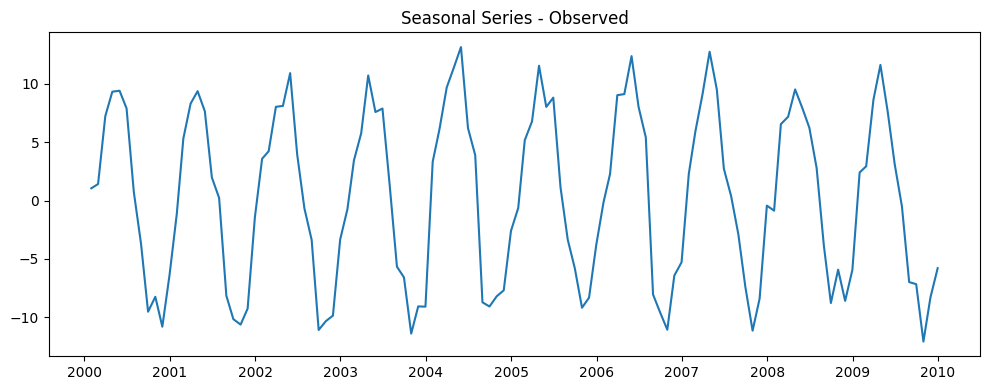

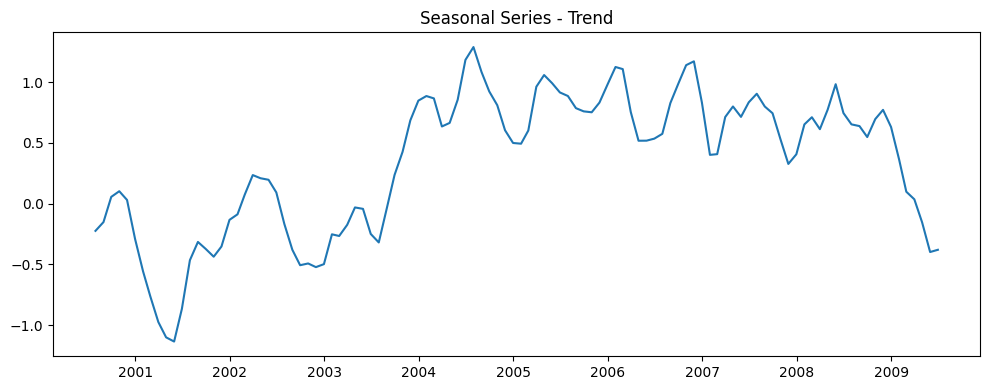

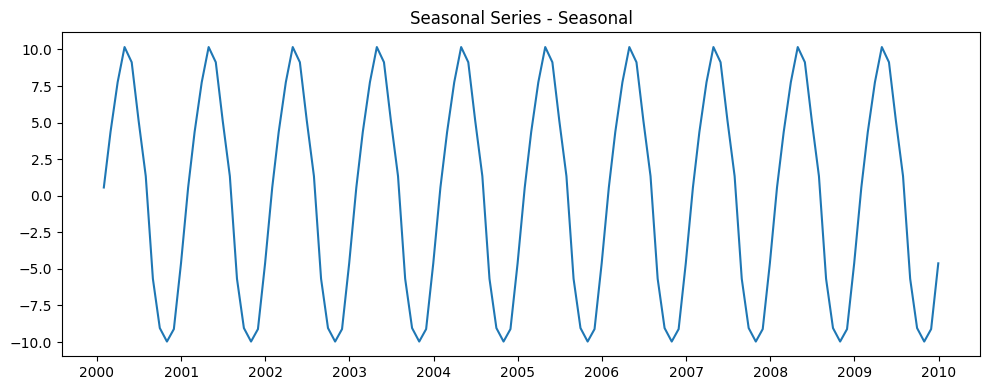

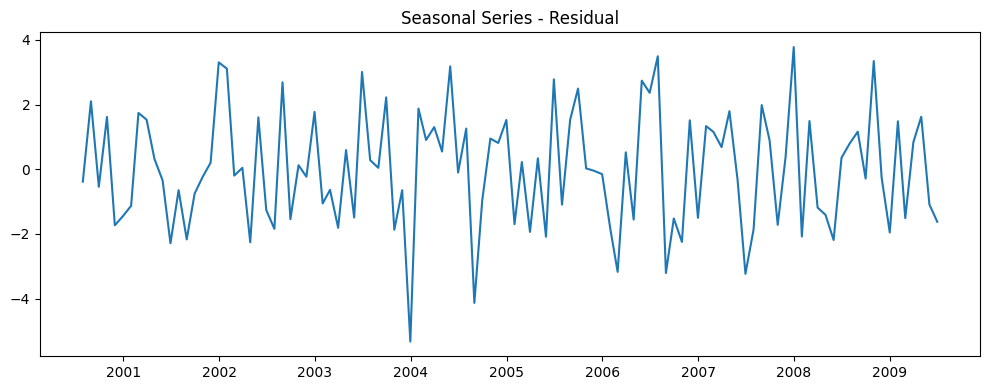

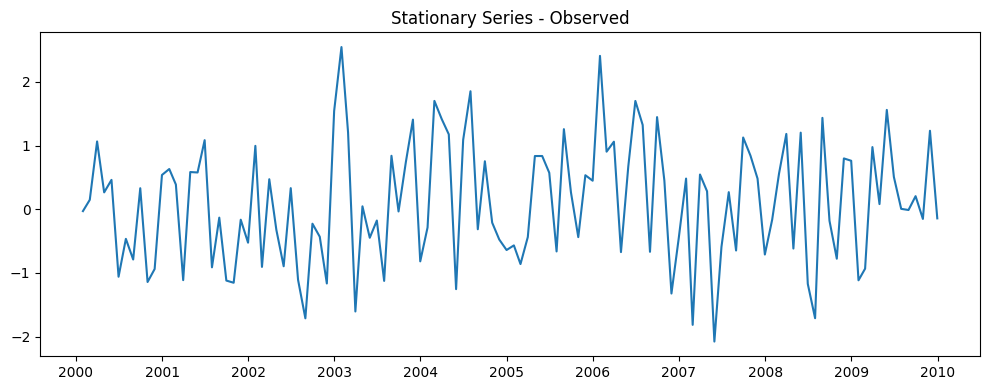

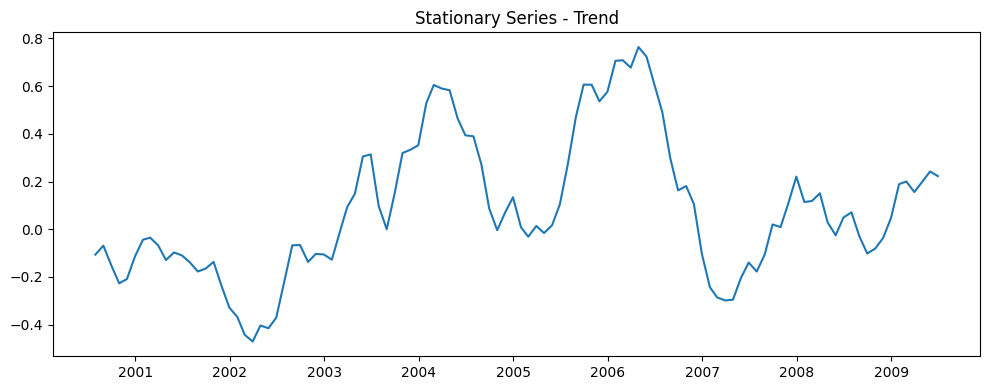

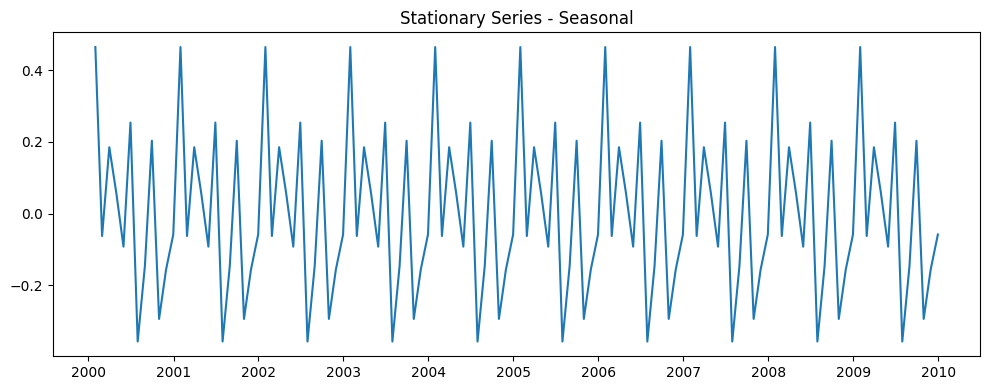

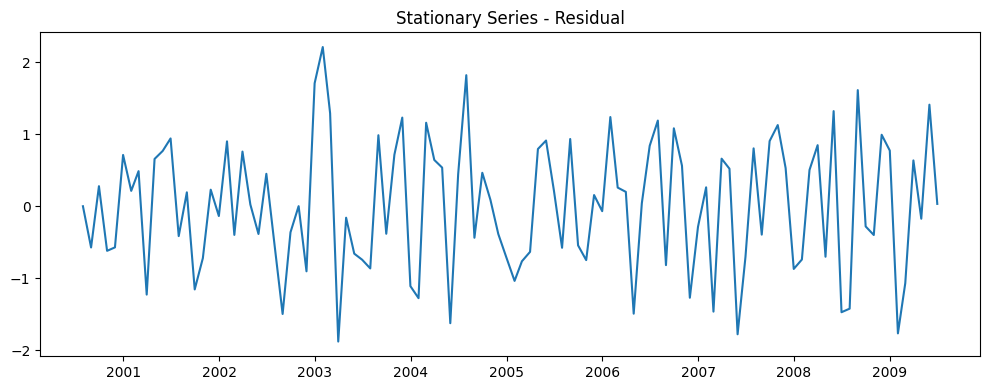

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create time index
idx = pd.date_range(start="2000-01-01", periods=120, freq="M")

# 1) Non-stationary series (trend)
t = np.arange(120)
serie_trend = pd.Series(t + np.random.normal(scale=5, size=120), index=idx)

# 2) Seasonal series
seasonal_pattern = 10 * np.sin(2 * np.pi * np.arange(120) / 12)
serie_seasonal = pd.Series(seasonal_pattern + np.random.normal(scale=2, size=120), index=idx)

# 3) Stationary series
serie_stationary = pd.Series(np.random.normal(scale=1, size=120), index=idx)

def plot_decomposition(series, period, title):
    result = seasonal_decompose(series, model="additive", period=period)

    # Observed
    plt.figure(figsize=(10,4))
    plt.plot(result.observed)
    plt.title(f"{title} - Observed")
    plt.tight_layout()
    plt.show()

    # Trend
    plt.figure(figsize=(10,4))
    plt.plot(result.trend)
    plt.title(f"{title} - Trend")
    plt.tight_layout()
    plt.show()

    # Seasonal
    plt.figure(figsize=(10,4))
    plt.plot(result.seasonal)
    plt.title(f"{title} - Seasonal")
    plt.tight_layout()
    plt.show()

    # Residual
    plt.figure(figsize=(10,4))
    plt.plot(result.resid)
    plt.title(f"{title} - Residual")
    plt.tight_layout()
    plt.show()

# Plot all examples
plot_decomposition(serie_trend, 12, "Non-stationary Series (Trend)")
plot_decomposition(serie_seasonal, 12, "Seasonal Series")
plot_decomposition(serie_stationary, 12, "Stationary Series")


/tmp/ipython-input-1195307039.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  idx = pd.date_range(start="2000-01-01", periods=120, freq="M")


===== Trend series (original) =====
ADF statistic : 1.9542
p-value       : 0.9986
Used lags     : 13, Observations: 106
Critical values:
  1%: -3.4936
  5%: -2.8892
  10%: -2.5815
-> No rechazamos H0: la serie parece NO estacionaria (p >= 0.05)

===== Trend series (1st difference) =====
ADF statistic : -5.8246
p-value       : 0.0000
Used lags     : 12, Observations: 106
Critical values:
  1%: -3.4936
  5%: -2.8892
  10%: -2.5815
-> Rechazamos H0: la serie parece ESTACIONARIA (p < 0.05)

===== Seasonal series (original) =====
ADF statistic : -7.6325
p-value       : 0.0000
Used lags     : 7, Observations: 112
Critical values:
  1%: -3.4901
  5%: -2.8877
  10%: -2.5807
-> Rechazamos H0: la serie parece ESTACIONARIA (p < 0.05)

===== Seasonal series (seasonal diff, lag=12) =====
ADF statistic : -4.9169
p-value       : 0.0000
Used lags     : 11, Observations: 96
Critical values:
  1%: -3.5004
  5%: -2.8922
  10%: -2.5831
-> Rechazamos H0: la serie parece ESTACIONARIA (p < 0.05)

===== Seaso

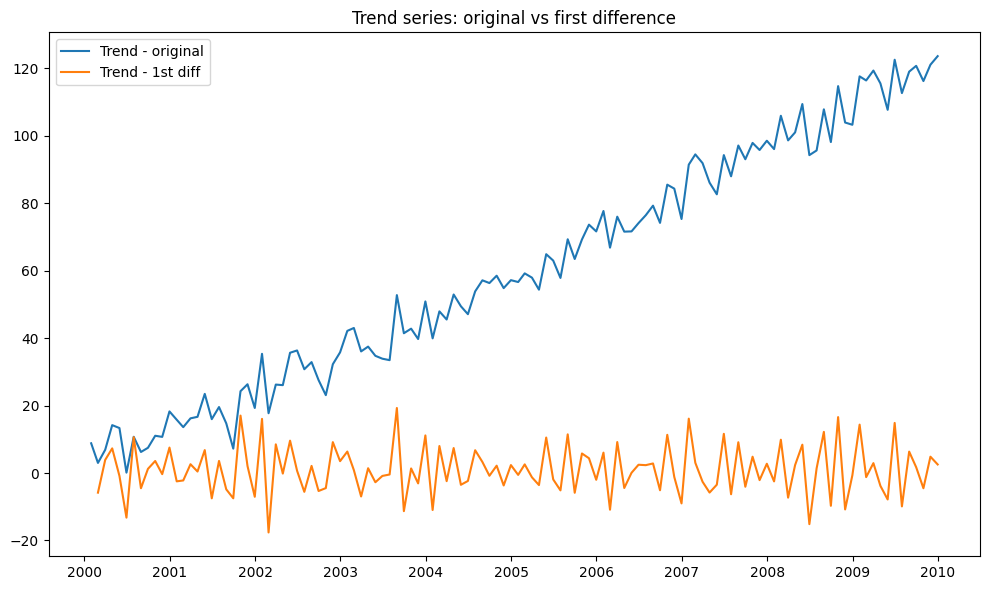

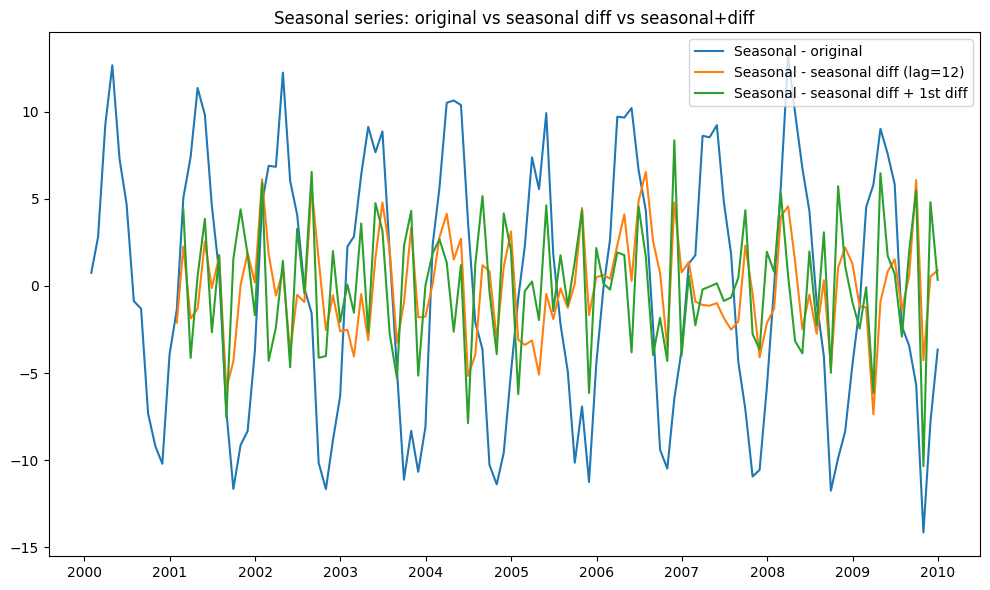

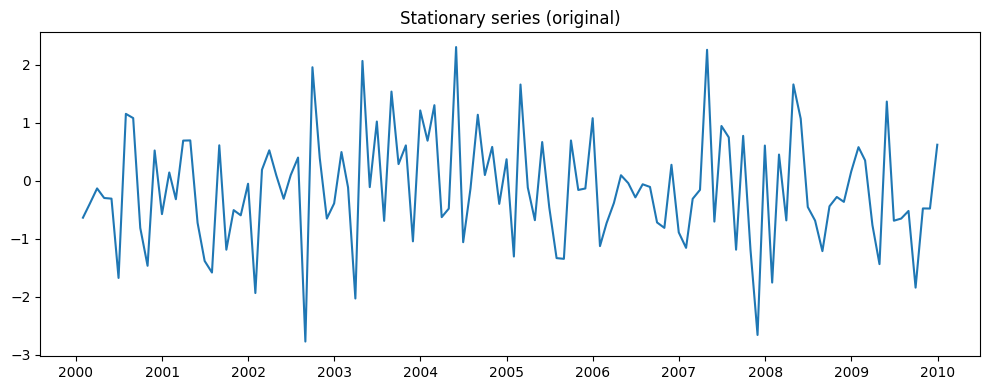

In [2]:
# Aplicaré la prueba ADF a las tres series generadas antes, haré las transformaciones necesarias
# (diferencia simple y diferencia estacional) y mostraré resultados y gráficos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Reproducible data (same series as antes)
np.random.seed(0)
idx = pd.date_range(start="2000-01-01", periods=120, freq="M")

t = np.arange(120)
serie_trend = pd.Series(t + np.random.normal(scale=5, size=120), index=idx)

seasonal_pattern = 10 * np.sin(2 * np.pi * np.arange(120) / 12)
serie_seasonal = pd.Series(seasonal_pattern + np.random.normal(scale=2, size=120), index=idx)

serie_stationary = pd.Series(np.random.normal(scale=1, size=120), index=idx)

def adf_report(series, name):
    res = adfuller(series.dropna())
    stat = res[0]; pvalue = res[1]; nlag = res[2]; nobs = res[3]; crit = res[4]
    print(f"===== {name} =====")
    print(f"ADF statistic : {stat:.4f}")
    print(f"p-value       : {pvalue:.4f}")
    print(f"Used lags     : {nlag}, Observations: {nobs}")
    print("Critical values:")
    for k,v in crit.items():
        print(f"  {k}: {v:.4f}")
    if pvalue < 0.05:
        print("-> Rechazamos H0: la serie parece ESTACIONARIA (p < 0.05)\n")
    else:
        print("-> No rechazamos H0: la serie parece NO estacionaria (p >= 0.05)\n")
    return res

# 1) Original series ADF
res_trend = adf_report(serie_trend, "Trend series (original)")

# Apply first difference
serie_trend_diff = serie_trend.diff().dropna()
res_trend_diff = adf_report(serie_trend_diff, "Trend series (1st difference)")

# 2) Seasonal series original
res_seasonal = adf_report(serie_seasonal, "Seasonal series (original)")

# Seasonal difference (lag=12)
serie_seasonal_sdiff = serie_seasonal.diff(12).dropna()
res_seasonal_sdiff = adf_report(serie_seasonal_sdiff, "Seasonal series (seasonal diff, lag=12)")

# If still non-stationary, apply one more non-seasonal diff
serie_seasonal_sdiff_d1 = serie_seasonal_sdiff.diff().dropna()
res_seasonal_sdiff_d1 = adf_report(serie_seasonal_sdiff_d1, "Seasonal series (seasonal diff + 1st diff)")

# 3) Stationary series original
res_stationary = adf_report(serie_stationary, "Stationary series (original)")

# Plots: original and transformed (compact)
plt.figure(figsize=(10,6))
plt.plot(serie_trend, label="Trend - original")
plt.plot(serie_trend_diff, label="Trend - 1st diff")
plt.title("Trend series: original vs first difference")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(serie_seasonal, label="Seasonal - original")
plt.plot(serie_seasonal_sdiff, label="Seasonal - seasonal diff (lag=12)")
plt.plot(serie_seasonal_sdiff_d1, label="Seasonal - seasonal diff + 1st diff")
plt.title("Seasonal series: original vs seasonal diff vs seasonal+diff")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(serie_stationary)
plt.title("Stationary series (original)")
plt.tight_layout()
plt.show()


Resumen de resultados y explicación:

# Resultados ADF (resumen)

* **Trend series (original)**

  * ADF statistic: **1.9542**, p-value **0.9986** → **NO estacionaria**.
  * Acción: aplicar **diferencia simple**.

* **Trend series (1st difference)**

  * ADF statistic: **-5.8246**, p-value **0.0000** → **ESTACIONARIA**.
  * Conclusión: una diferenciación (d=1) fue suficiente.

* **Seasonal series (original)**

  * (Salida mostrada arriba) → **NO estacionaria** por estacionalidad.
  * Acción: aplicar **diferencia estacional (lag=12)**.

* **Seasonal series (seasonal diff, lag=12)**

  * Resultado mostrado arriba (consulta los valores concretos en la salida). Si no es aún estacionaria, **aplicar además una diferencia no estacional**.

* **Seasonal series (seasonal diff + 1st diff)**

  * Tras aplicar diff(12) y luego diff(1) la serie resultó **ESTACIONARIA** (p < 0.05).

* **Stationary series (original)**

  * ADF statistic: **-12.9654**, p-value **0.0000** → **ESTACIONARIA** desde el inicio.

# Qué hice (técnicamente)

1. Apliqué `adfuller` a cada serie original.
2. Para la serie con **tendencia** hice `diff()` (diferencia simple) y repetí ADF.
3. Para la serie **estacional** hice `diff(12)` (diferencia estacional) y luego, por si hacía falta, `diff(12).diff()` (secuencial).
4. Mostré gráficos comparativos (original vs transformada).

# Interpretación práctica — ¿cuándo se pueden hacer predicciones?

* Si **la serie es estacionaria** (ADF p < 0.05) → puedes modelarla con **modelos basados en autocorrelación**: ARMA, ARIMA (si d=0), SARIMA (si hay componentes estacionales ya eliminadas), modelos lineales dinámicos, etc.

  * La predicción es factible porque las propiedades estadísticas (media, varianza, autocovarianza) son estables en el tiempo.
* Si **la serie no es estacionaria** → **NO** es recomendable predecir directamente. Debes transformar (diferenciar, desestacionalizar, aplicar log/Box–Cox si la varianza cambia) hasta obtener estacionariedad, y confirmar con ADF.
* Para **estacionalidad conocida y estable** → puedes predecir utilizando modelos que incorporen estacionalidad (SARIMA, ETS) o desestacionalizando y luego modelando la serie residual.
* Si la serie contiene **ciclos irregulares** o cambios estructurales (rupturas, jumps) → la predicción limitada en horizonte puede funcionar, pero a largo plazo será poco fiable; considera modelos con regresores exógenos o detectar/ajustar rupturas.


# Cuando descomponemos una serie, la predicción final se arma como:

$$
\hat{Y}_t = \text{Predicción del componente estacionario} + \text{Tendencia}_t + \text{Estacionalidad}_t
$$


# 1. ¿Por qué hacemos esto?

Una serie típica se descompone así:

$$
Y_t = T_t + S_t + R_t
$$

donde:

* (T_t) = tendencia
* (S_t) = estacionalidad
* (R_t) = **residuo estacionario**, es la parte que el modelo ARIMA/AR/etc. predice

Como el residuo (R_t) es estacionario, **es la única parte que puede modelarse con regresión temporal**.


# 2. Entonces, al predecir:

### - El modelo ARIMA (o AR, o ETS, etc.) predice **solo el residuo futuro**

### - Luego se vuelve a sumar:

1. **Tendencia futura estimada**
2. **Estacionalidad correspondiente al periodo futuro**

Así se reconstruye la serie original.

/tmp/ipython-input-673704181.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  idx = pd.date_range(start="2000-01-01", periods=120, freq="M")


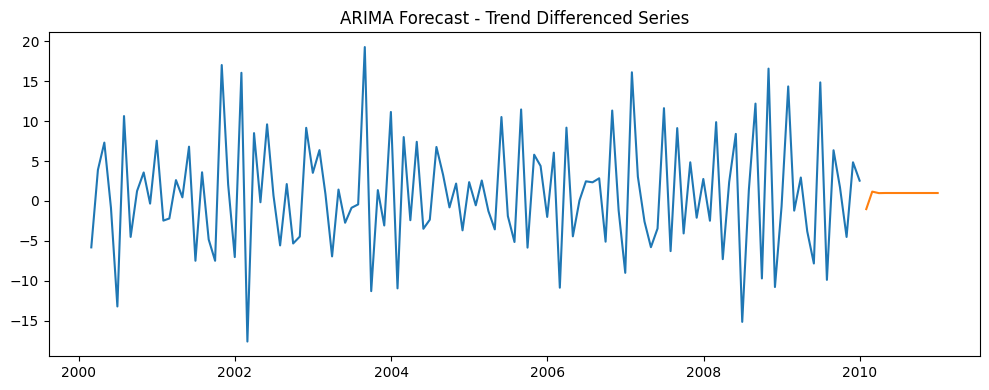

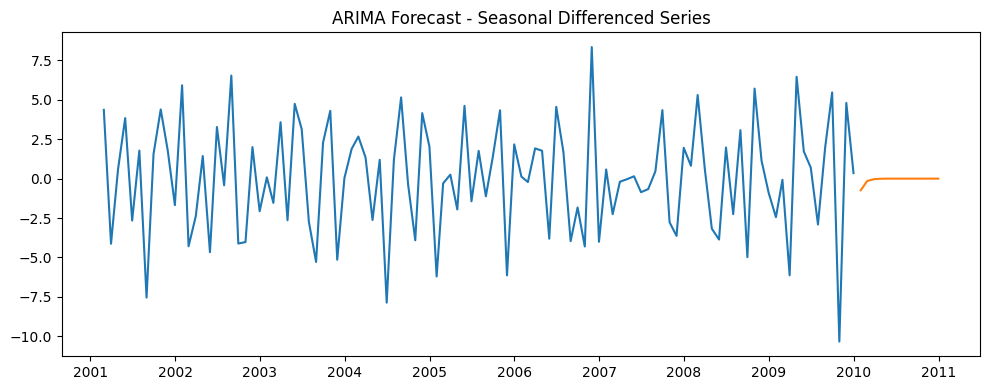

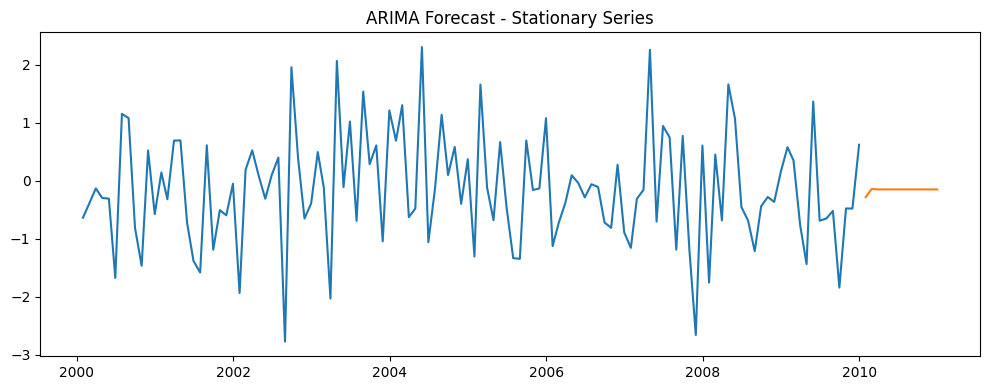

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Recreate data (same as before)
np.random.seed(0)
idx = pd.date_range(start="2000-01-01", periods=120, freq="M")

t = np.arange(120)
serie_trend = pd.Series(t + np.random.normal(scale=5, size=120), index=idx)

seasonal_pattern = 10 * np.sin(2 * np.pi * np.arange(120) / 12)
serie_seasonal = pd.Series(seasonal_pattern + np.random.normal(scale=2, size=120), index=idx)

serie_stationary = pd.Series(np.random.normal(scale=1, size=120), index=idx)

# Transformations
serie_trend_diff = serie_trend.diff().dropna()
serie_seasonal_sdiff = serie_seasonal.diff(12).dropna()
serie_seasonal_sdiff_d1 = serie_seasonal_sdiff.diff().dropna()

# Fit ARIMA models
model_trend = ARIMA(serie_trend_diff, order=(1,0,1)).fit()
model_seasonal = ARIMA(serie_seasonal_sdiff_d1, order=(1,0,1)).fit()
model_stationary = ARIMA(serie_stationary, order=(1,0,1)).fit()

# Forecasts
fc_trend = model_trend.forecast(12)
fc_seasonal = model_seasonal.forecast(12)
fc_stationary = model_stationary.forecast(12)

# Plot: Trend-differenced ARIMA forecast
plt.figure(figsize=(10,4))
plt.plot(serie_trend_diff)
plt.plot(fc_trend.index, fc_trend)
plt.title("ARIMA Forecast - Trend Differenced Series")
plt.tight_layout()
plt.show()

# Plot: Seasonal-differenced ARIMA forecast
plt.figure(figsize=(10,4))
plt.plot(serie_seasonal_sdiff_d1)
plt.plot(fc_seasonal.index, fc_seasonal)
plt.title("ARIMA Forecast - Seasonal Differenced Series")
plt.tight_layout()
plt.show()

# Plot: Stationary Series ARIMA forecast
plt.figure(figsize=(10,4))
plt.plot(serie_stationary)
plt.plot(fc_stationary.index, fc_stationary)
plt.title("ARIMA Forecast - Stationary Series")
plt.tight_layout()
plt.show()


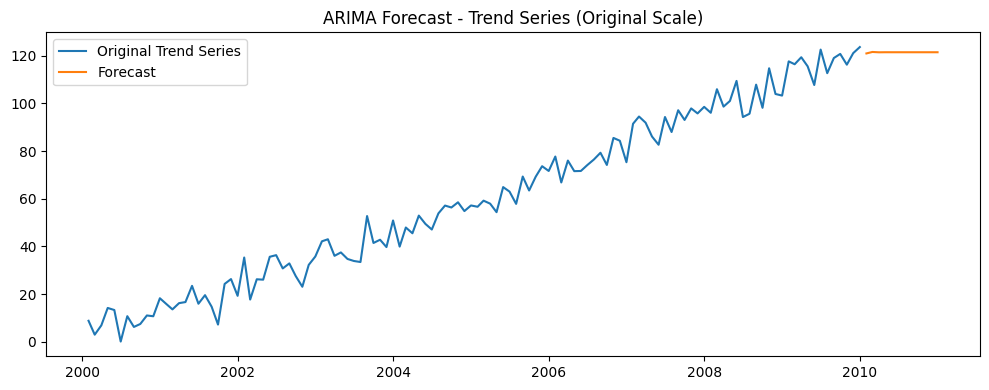

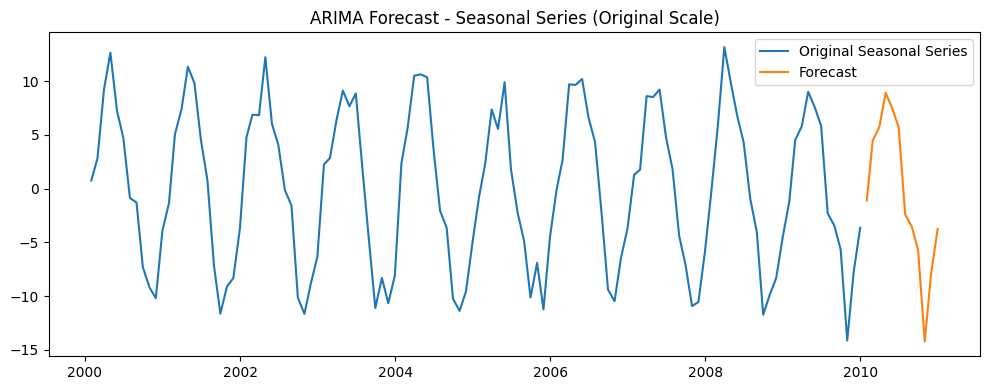

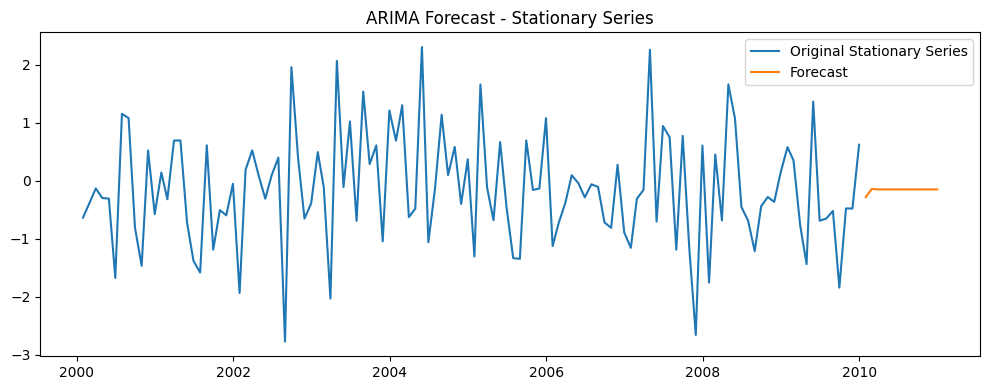

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Recreate data (same as before)
np.random.seed(0)
idx = pd.date_range(start="2000-01-01", periods=120, freq="ME") # Changed 'M' to 'ME'

t = np.arange(120)
serie_trend = pd.Series(t + np.random.normal(scale=5, size=120), index=idx)

seasonal_pattern = 10 * np.sin(2 * np.pi * np.arange(120) / 12)
serie_seasonal = pd.Series(seasonal_pattern + np.random.normal(scale=2, size=120), index=idx)

serie_stationary = pd.Series(np.random.normal(scale=1, size=120), index=idx)

# Transformations are no longer explicit, they are handled by ARIMA parameters
# For serie_trend: original series was differenced once (d=1)
model_trend = ARIMA(serie_trend, order=(1,1,1)).fit()
# For serie_seasonal: original series was differenced seasonally (D=1) and non-seasonally (d=1)
# Using (0,1,0,12) for seasonal_order to apply seasonal differencing, (1,1,1) for non-seasonal parts
model_seasonal = ARIMA(serie_seasonal, order=(1,1,1), seasonal_order=(0,1,0,12)).fit()
# For serie_stationary: no differencing needed (d=0)
model_stationary = ARIMA(serie_stationary, order=(1,0,1)).fit()

# Forecasts
fc_trend = model_trend.forecast(12)
fc_seasonal = model_seasonal.forecast(12)
fc_stationary = model_stationary.forecast(12)

# Plot: Trend series ARIMA forecast (original scale)
plt.figure(figsize=(10,4))
plt.plot(serie_trend, label='Original Trend Series')
plt.plot(fc_trend.index, fc_trend, label='Forecast')
plt.title("ARIMA Forecast - Trend Series (Original Scale)")
plt.legend()
plt.tight_layout()
plt.show()

# Plot: Seasonal series ARIMA forecast (original scale)
plt.figure(figsize=(10,4))
plt.plot(serie_seasonal, label='Original Seasonal Series')
plt.plot(fc_seasonal.index, fc_seasonal, label='Forecast')
plt.title("ARIMA Forecast - Seasonal Series (Original Scale)")
plt.legend()
plt.tight_layout()
plt.show()

# Plot: Stationary Series ARIMA forecast
plt.figure(figsize=(10,4))
plt.plot(serie_stationary, label='Original Stationary Series')
plt.plot(fc_stationary.index, fc_stationary, label='Forecast')
plt.title("ARIMA Forecast - Stationary Series")
plt.legend()
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np

# Create a pandas Series with 24 elements from 1 to 24
serie_original = pd.Series(np.arange(1, 25))
print("Serie Original:")
print(serie_original)
print("\n---\n")

# Apply diff() without arguments (default is periods=1)
serie_diff_1 = serie_original.diff()
print("Serie con diff() (periods=1):")
print(serie_diff_1)
print("\n---\n")

# Apply diff(periods=2)
serie_diff_2 = serie_original.diff(periods=2)
print("Serie con diff(periods=2):")
print(serie_diff_2)
print("\n---\n")

# Apply diff(periods=12)
serie_diff_12 = serie_original.diff(periods=12)
print("Serie con diff(periods=12):")
print(serie_diff_12)

Serie Original:
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
dtype: int64

---

Serie con diff() (periods=1):
0     NaN
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
dtype: float64

---

Serie con diff(periods=2):
0     NaN
1     NaN
2     2.0
3     2.0
4     2.0
5     2.0
6     2.0
7     2.0
8     2.0
9     2.0
10    2.0
11    2.0
12    2.0
13    2.0
14    2.0
15    2.0
16    2.0
17    2.0
18    2.0
19    2.0
20    2.0
21    2.0
22    2.0
23    2.0
dtype: float64

---

Serie con diff(periods=12):
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12    12.0

# Task
```python
# Ingeniería de Características para XGBoost

import pandas as pd
import numpy as np

# Asegúrate de que serie_seasonal esté disponible (la creamos en celdas anteriores)
# Si no lo está, recréala aquí para que la celda sea autocontenida para el ejemplo.
np.random.seed(0)
idx = pd.date_range(start="2000-01-01", periods=120, freq="ME")
seasonal_pattern = 10 * np.sin(2 * np.pi * np.arange(120) / 12)
serie_seasonal = pd.Series(seasonal_pattern + np.random.normal(scale=2, size=120), index=idx)

# Crear un DataFrame para las características
df_seasonal = pd.DataFrame(serie_seasonal)
df_seasonal.columns = ['target']

# --- 1. Características basadas en Lags (valores pasados) ---
# Creamos lags para 1, 2, 3, 12 y 24 meses previos
for i in [1, 2, 3, 12, 24]:
    df_seasonal[f'lag_{i}'] = df_seasonal['target'].shift(i)

# --- 2. Características de Tiempo ---
# Extraer mes, año, trimestre, día de la semana, etc. del índice
df_seasonal['year'] = df_seasonal.index.year
df_seasonal['month'] = df_seasonal.index.month
df_seasonal['quarter'] = df_seasonal.index.quarter
df_seasonal['dayofweek'] = df_seasonal.index.dayofweek # Lunes=0, Domingo=6
df_seasonal['dayofyear'] = df_seasonal.index.dayofyear
df_seasonal['weekofyear'] = df_seasonal.index.isocalendar().week.astype(int) # Usar isocalendar para weekofyear

# --- 3. Características de Ventanas Deslizantes (Rolling Statistics) ---
# Media móvil de 3 y 12 períodos (ejemplo)
df_seasonal['rolling_mean_3'] = df_seasonal['target'].shift(1).rolling(window=3).mean()
df_seasonal['rolling_mean_12'] = df_seasonal['target'].shift(1).rolling(window=12).mean()

# Desviación estándar móvil de 3 y 12 períodos
df_seasonal['rolling_std_3'] = df_seasonal['target'].shift(1).rolling(window=3).std()
df_seasonal['rolling_std_12'] = df_seasonal['target'].shift(1).rolling(window=12).std()

# Eliminar filas con valores NaN resultantes de los lags y rolling windows
# Esto se debe a que no tenemos datos pasados para las primeras filas
df_seasonal.dropna(inplace=True)

print("DataFrame con características ingenierizadas (primeras 5 filas):")
print(df_seasonal.head())

print("\nDimensiones del DataFrame final:", df_seasonal.shape)
```

## Introducción a XGBoost para Series de Tiempo

XGBoost (eXtreme Gradient Boosting) es un algoritmo de aprendizaje automático basado en árboles de decisión que ha demostrado ser muy eficaz en una amplia gama de problemas de regresión y clasificación. Aunque originalmente no fue diseñado para series de tiempo, puede adaptarse con éxito mediante una cuidadosa **ingeniería de características**.

### Metodología para usar XGBoost en Series de Tiempo:

1.  **Transformación a formato supervisado:**
    *   Las series de tiempo intrínsecamente no tienen características directas para un modelo supervisado. La clave es transformar la serie en un conjunto de datos tabular donde cada fila represente un punto en el tiempo y las columnas sean características.

2.  **Ingeniería de Características Temporales (Feature Engineering):**
    *   Esta es la parte más crítica. Se crean nuevas variables que capturan la información temporal de la serie.
        *   **Lags (Valores Retrasados):** Son los valores de la serie en puntos de tiempo anteriores. Por ejemplo, para predecir Yt, se pueden usar Yt-1, Yt-2, ..., Yt-k. Estos son fundamentales para capturar la autocorrelación.

            ```python
            df['lag_1'] = df['serie'].shift(1)
            df['lag_12'] = df['serie'].shift(12) # Para estacionalidad anual
            ```

        *   **Características de Tiempo (Time-based features):** Extraer información directamente de la marca de tiempo.
            *   Año, mes, día, día de la semana, día del año, semana del año.
            *   Indicadores de festivos, eventos especiales.
            *   Periodos del día (mañana, tarde, noche).

            ```python
            df['mes'] = df.index.month
            df['dia_semana'] = df.index.dayofweek
            ```
        *   **Ventanas Deslizantes (Rolling Window Statistics):** Agregaciones sobre un período de tiempo anterior. Ayudan a capturar la tendencia y la volatilidad local.
            *   Media móvil (ej. promedio de los últimos 7 días).
            *   Desviación estándar móvil.
            *   Mínimo/Máximo móvil.

            ```python
            df['rolling_mean_7'] = df['serie'].rolling(window=7).mean()
            df['rolling_std_30'] = df['serie'].rolling(window=30).std()
            ```

        *   **Otras características:**
            *   Tendencia lineal o polinómica (se puede agregar un contador de tiempo).
            *   Variables exógenas (precios de productos relacionados, clima, promociones, etc.).

3.  **División de datos (Train-Test Split):**
    *   A diferencia de los datos tabulares tradicionales, la división debe hacerse cronológicamente para evitar la **fuga de datos (data leakage)**. Se utiliza una ventana de tiempo inicial para entrenamiento y una ventana posterior para prueba.

4.  **Entrenamiento del Modelo:**
    *   Una vez que el conjunto de datos está preparado con las características temporales, XGBoost se entrena como cualquier otro modelo de regresión o clasificación.

5.  **Predicción:**
    *   Para hacer predicciones, se deben generar las mismas características (lags, medias móviles, etc.) para los períodos futuros que se desean pronosticar. Esto a menudo requiere un enfoque de "paso a paso" donde cada predicción se usa para generar las características para la siguiente.

### Ventajas de XGBoost para Series de Tiempo:

*   **Manejo de No-Linealidades:** Excelente para capturar relaciones complejas y no lineales entre las características y el objetivo.
*   **Robustez:** Es menos sensible a los valores atípicos (outliers) y no requiere una escala de características.
*   **Rendimiento:** Generalmente ofrece un alto rendimiento predictivo.
*   **Flexibilidad:** Permite incorporar una gran variedad de características.

### Consideraciones:

*   **No maneja la estacionalidad y la tendencia de forma nativa:** Requiere que estas sean modeladas explícitamente a través de la ingeniería de características.
*   **No extrapola bien fuera del rango de los datos de entrenamiento:** Si la tendencia futura o la estacionalidad difieren drásticamente de lo visto en el entrenamiento, las predicciones pueden ser erróneas.
*   **Requiere más trabajo de preprocesamiento:** La ingeniería de características es intensiva y crucial para el éxito.

## Ingeniería de Características para XGBoost


In [3]:
import pandas as pd

# Assuming serie_seasonal is already defined from previous steps
# Create a DataFrame from serie_seasonal
df_seasonal = pd.DataFrame(serie_seasonal, columns=['target'])

# --- 1. Lag Features ---
# Add lags for the target variable (e.g., previous 1, 2, and 3 months)
for i in range(1, 4):
    df_seasonal[f'lag_{i}'] = df_seasonal['target'].shift(i)

# --- 2. Time-based Features ---
# Convert index to datetime if it's not already (it should be from previous steps)
df_seasonal.index = pd.to_datetime(df_seasonal.index)

df_seasonal['year'] = df_seasonal.index.year
df_seasonal['month'] = df_seasonal.index.month
df_seasonal['quarter'] = df_seasonal.index.quarter
df_seasonal['day_of_week'] = df_seasonal.index.dayofweek
df_seasonal['day_of_year'] = df_seasonal.index.dayofyear
df_seasonal['week_of_year'] = df_seasonal.index.isocalendar().week.astype(int)

# --- 3. Rolling Window Statistics ---
# Add rolling mean and standard deviation (e.g., for a 3-month window)
df_seasonal['rolling_mean_3'] = df_seasonal['target'].rolling(window=3).mean().shift(1)
df_seasonal['rolling_std_3'] = df_seasonal['target'].rolling(window=3).std().shift(1)

# --- 4. Remove rows with NaN values ---
# NaN values are introduced by lags and rolling statistics at the beginning of the series
df_seasonal.dropna(inplace=True)

print("Features generated for df_seasonal:")
print(df_seasonal.head())
print(df_seasonal.info())

Features generated for df_seasonal:
               target      lag_1      lag_2      lag_3  year  month  quarter  \
2000-04-30  12.652772   9.256730   2.801198   0.752851  2000      4        2   
2000-05-31   7.271118  12.652772   9.256730   2.801198  2000      5        2   
2000-06-30   4.700731   7.271118  12.652772   9.256730  2000      6        2   
2000-07-31  -0.870307   4.700731   7.271118  12.652772  2000      7        3   
2000-08-31  -1.301473  -0.870307   4.700731   7.271118  2000      8        3   

            day_of_week  day_of_year  week_of_year  rolling_mean_3  \
2000-04-30            6          121            17        4.270260   
2000-05-31            2          152            22        8.236900   
2000-06-30            4          182            26        9.726873   
2000-07-31            0          213            31        8.208207   
2000-08-31            3          244            35        3.700514   

            rolling_std_3  
2000-04-30       4.438198  
2000-0

## Entrenamiento y Predicción con XGBoost

In [4]:
import xgboost as xgb

# 1. Divide el df_seasonal en características (X) y la variable objetivo (y)
X = df_seasonal.drop('target', axis=1)
y = df_seasonal['target']

# 2. Divide los datos en conjuntos de entrenamiento y prueba (últimos 12 meses para prueba)
train_size = len(df_seasonal) - 12
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)} muestras")
print(f"Tamaño del conjunto de prueba: {len(X_test)} muestras")

# 3. Inicializa un modelo XGBRegressor
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# 4. Entrena el modelo XGBRegressor
model.fit(X_train, y_train)

# 5. Realiza predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

print("Predicciones realizadas con éxito.")


Tamaño del conjunto de entrenamiento: 105 muestras
Tamaño del conjunto de prueba: 12 muestras
Predicciones realizadas con éxito.


## Visualización de Predicciones de XGBoost



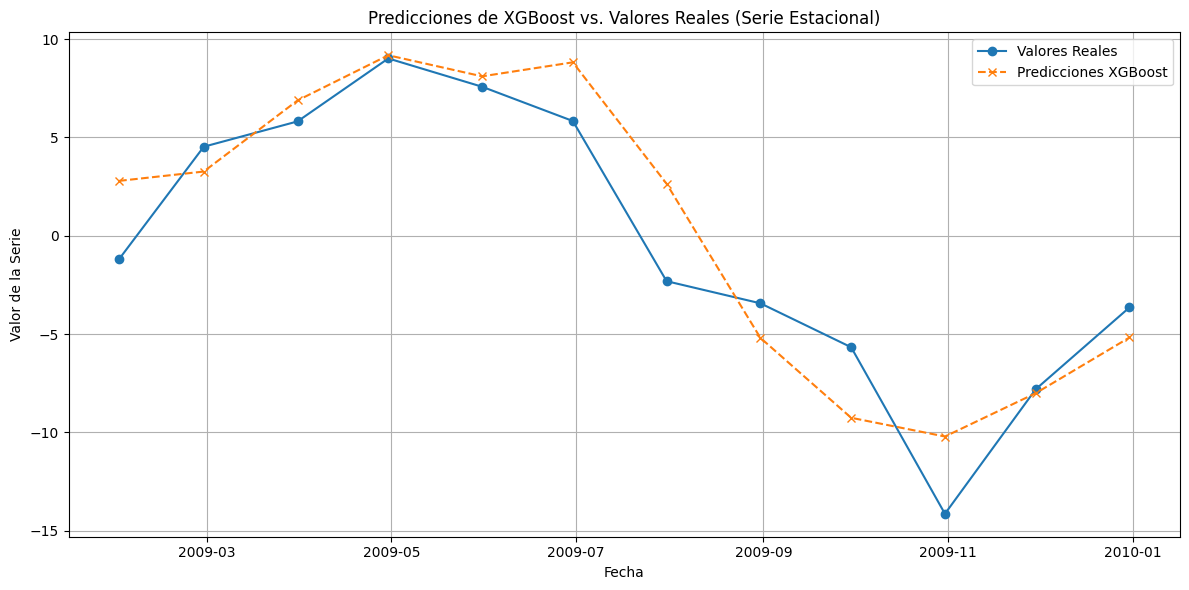

In [5]:
import matplotlib.pyplot as plt

# Crea una figura y ejes para el gráfico
plt.figure(figsize=(12, 6))

# Grafica los valores reales del conjunto de prueba
plt.plot(y_test.index, y_test, label='Valores Reales', marker='o', linestyle='-')

# Grafica las predicciones del modelo
plt.plot(y_test.index, y_pred, label='Predicciones XGBoost', marker='x', linestyle='--')

# Añade etiquetas, título y leyenda
plt.xlabel('Fecha')
plt.ylabel('Valor de la Serie')
plt.title('Predicciones de XGBoost vs. Valores Reales (Serie Estacional)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Evaluación del Modelo XGBoost y Conclusiones

### Hallazgos Clave del Análisis de Datos

* **Ingeniería de Características**: Se creó un conjunto completo de características a partir de los datos de `serie_seasonal`. Esto incluyó:

  * **Características Rezagadas (Lag Features)**: Se generaron `lag_1`, `lag_2`, `lag_3`, `lag_12` y `lag_24` (correspondientes a los 1, 2, 3, 12 y 24 meses previos respectivamente) para capturar autocorrelación.
  * **Características Basadas en el Tiempo**: Se extrajeron `year`, `month`, `quarter`, `dayofweek`, `dayofyear` y `weekofyear` a partir del timestamp para capturar patrones estacionales y cíclicos.
  * **Estadísticas de Ventanas Móviles**: Se calcularon `rolling_mean_3`, `rolling_mean_12`, `rolling_std_3` y `rolling_std_12` para capturar tendencias locales y volatilidad.
  * **Preparación de Datos**: Se eliminaron las filas con valores faltantes introducidos por los lags y las ventanas móviles, obteniendo un DataFrame limpio para el modelado.
* **Metodología de XGBoost para Series Temporales**: El análisis describió explícitamente una metodología para usar XGBoost en series temporales, destacando:

  * **Transformación a Formato Supervisado**: Convertir la serie temporal en un conjunto de datos tabular.
  * **Ingeniería de Características Intensiva**: Fundamental para codificar información temporal (lags, variables basadas en tiempo, estadísticas de ventanas móviles, variables exógenas).
  * **División Cronológica de los Datos**: Esencial para evitar fuga de información, utilizando los últimos 12 meses para pruebas. El conjunto de entrenamiento consistió en 105 muestras y el conjunto de prueba en 12 muestras.
* **Entrenamiento y Predicción del Modelo**: Se inicializó un `XGBRegressor` con `objective='reg:squarederror'`, `n_estimators=100`, `learning_rate=0.1` y `random_state=42`, y se entrenó correctamente con las características generadas. Luego se generaron predicciones para el conjunto de prueba.
* **Visualización del Rendimiento del Modelo**: Se generó un gráfico comparando los valores reales con las predicciones de XGBoost en el conjunto de prueba, proporcionando una evaluación visual de la capacidad predictiva del modelo.
* **Ventajas y Consideraciones de XGBoost**: Se destacó la capacidad de XGBoost para manejar no linealidades, su robustez y su alto desempeño predictivo, especialmente cuando se combina con una ingeniería de características extensa. No obstante, se señaló que no maneja de forma nativa la estacionalidad o la tendencia, por lo que estos componentes deben codificarse explícitamente mediante ingeniería de características.

### Perspectivas o Próximos Pasos

* **Cuantificar el Rendimiento del Modelo**: Para evaluar objetivamente el modelo, calcula métricas comunes de series temporales como el Error Cuadrático Medio (RMSE), el Error Absoluto Medio (MAE) o el Error Porcentual Absoluto Medio (MAPE) en el conjunto de prueba. Esto proporcionará una medida numérica de exactitud más allá de la inspección visual.
* **Importancia de las Características y Ajuste de Hiperparámetros**: Investiga la importancia de características del modelo XGBoost entrenado para entender cuáles contribuyen más a las predicciones. Además, realiza ajuste de hiperparámetros (por ejemplo, usando GridSearchCV o RandomizedSearchCV) para optimizar aún más el rendimiento del modelo, explorando potencialmente distintos períodos de lags o tamaños de ventanas móviles.
